<a href="https://colab.research.google.com/github/1975JHK/Second_Paper/blob/main/Capstone_Project_210915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Loading the required packages
pcks = c('easypackages', 'tidyverse', 'readxl', 'caret', 'magrittr', 'e1071')
install.packages(pcks)
library(easypackages)
libraries(c('tidyverse', 'readxl', 'caret', 'magrittr',
            'e1071'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘proxy’


Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: readxl

Loading required package: caret

Loading required package: lattice


Attaching package: 

In [5]:
# Setting up environments
Sys.setenv(LANG = 'en')
theme_set(new = theme_minimal())
options(warn = -1)

# Importing the dataset
raw_data <- read_excel('/content/raw_data.xlsx')
raw_data <- raw_data %>% filter(공장코드 == 'P2')

New names:
* 공장명...3 -> 공장명...2
* 공장명...5 -> 공장명...4
* 반응온도...11 -> 반응온도...10
* 반응온도...13 -> 반응온도...12



[1] 528  36

Lot_ID           Date      Viscosity     React.Time     React.Temp 
             0              0              0              0              0 
     Thickness          Resin       Hardener         Blower    Plasticizer 
             0             37             37             37             37 
          Coal     Resin.Temp Hanrdener.Temp    Blower.Temp          Speed 
            37             36             36             36             36 
        U.Temp         L.Temp      Pressure1      Pressure2      Pressure3 
            36             36              0              0              0 
     Pressure4      Pressure5      Pressure6      Pressure7      Pressure8 
             0              0              0              0              0 
     Pressure9     Pressure10     Pressure11   Conductivity     ShrinkageL 
             0              0              0              0              0 
    ShrinkageW Peel.Strength1 Peel.Strength2 Peel.Strength3    Tissue.Type 
             0              0              0              0              0 
        Length 
             0

[1] 491  36

    Month
Year 03 04 05 06 07 08
  21 74 69 76 67 82 73

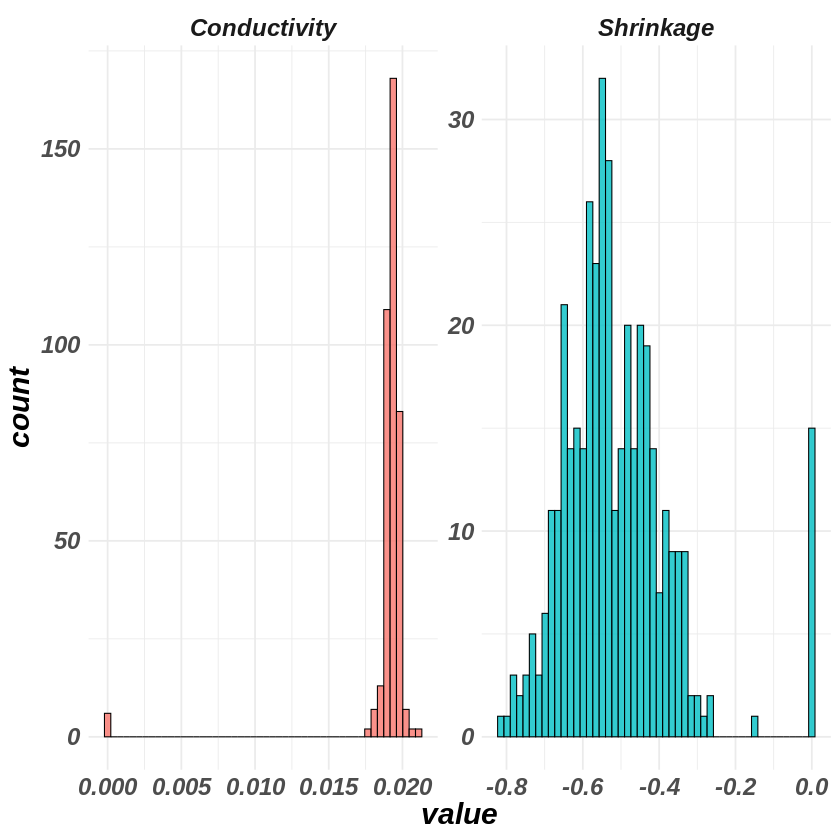

`geom_smooth()` using formula 'y ~ x'



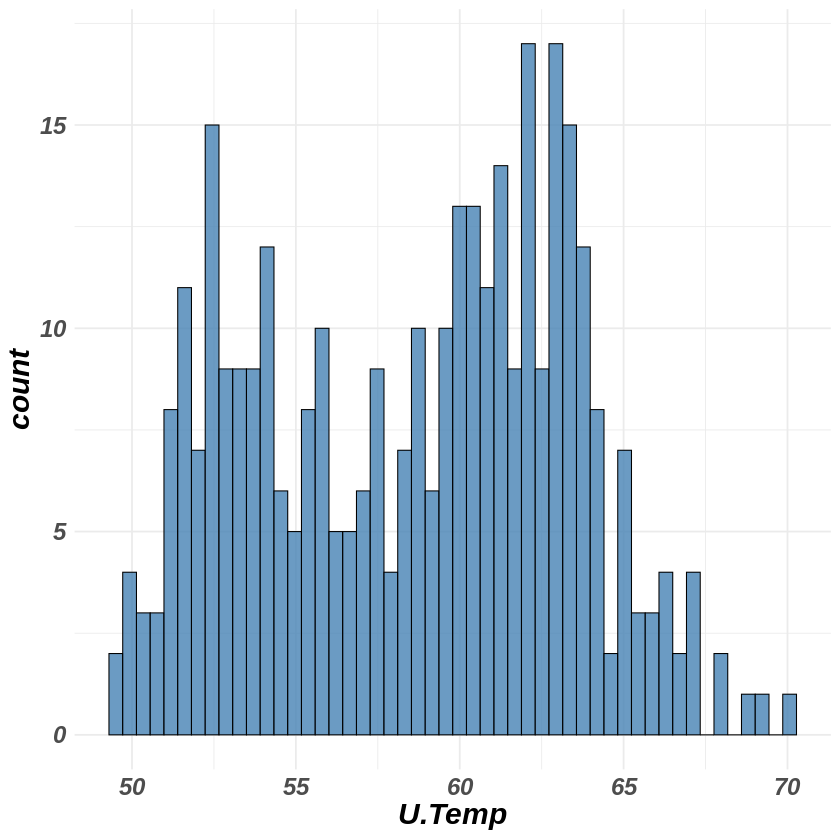

[1] "Lot_ID"         "Year"           "Month"          "Day"           
 [5] "Viscosity"      "React.Time"     "React.Temp"     "Thickness"     
 [9] "Resin"          "Hardener"       "Blower"         "Plasticizer"   
[13] "Coal"           "Resin.Temp"     "Hanrdener.Temp" "Blower.Temp"   
[17] "Speed"          "U.Temp"         "L.Temp"         "Pressure1"     
[21] "Pressure2"      "Pressure3"      "Pressure4"      "Pressure5"     
[25] "Pressure6"      "Pressure7"      "Pressure8"      "Pressure9"     
[29] "Pressure10"     "Pressure11"     "Tissue.Type"    "Conductivity"  
[33] "Shrinkage"      "P1"             "P2"             "P3"

`geom_smooth()` using formula 'y ~ x'



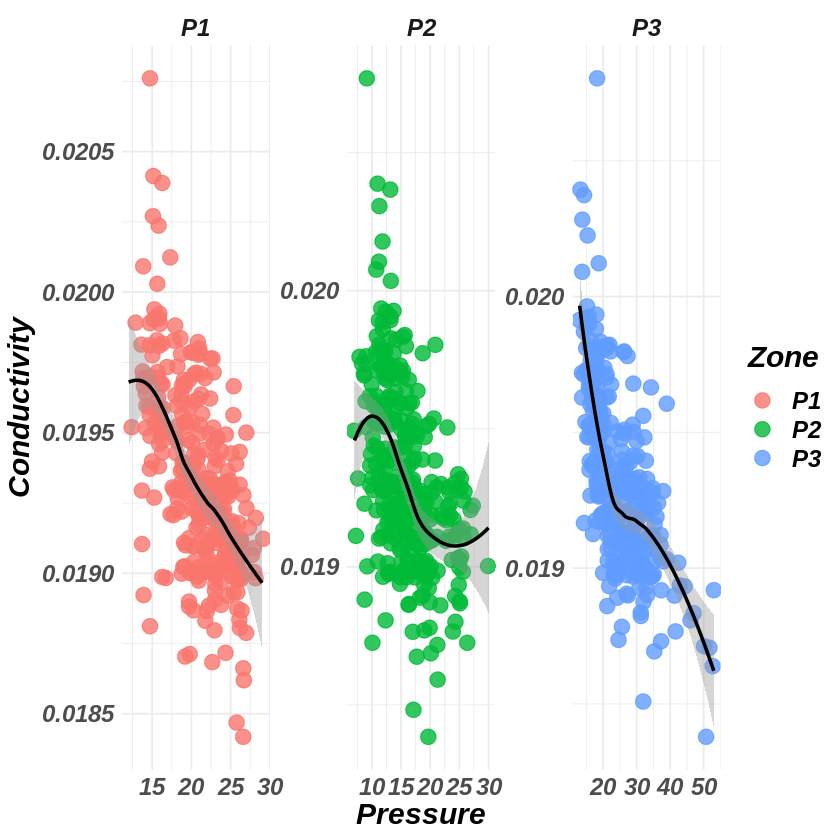

[1] "Lot_ID"       "Year"         "Month"        "Day"          "Viscosity"   
 [6] "React.Time"   "React.Temp"   "Thickness"    "Resin"        "Hardener"    
[11] "Blower"       "Resin.Temp"   "Speed"        "U.Temp"       "L.Temp"      
[16] "Pressure1"    "Pressure2"    "Pressure3"    "Pressure4"    "Pressure5"   
[21] "Pressure6"    "Pressure7"    "Pressure8"    "Pressure9"    "Pressure10"  
[26] "Pressure11"   "Tissue.Type"  "P1"           "P2"           "P3"          
[31] "Conductivity" "Shrinkage"

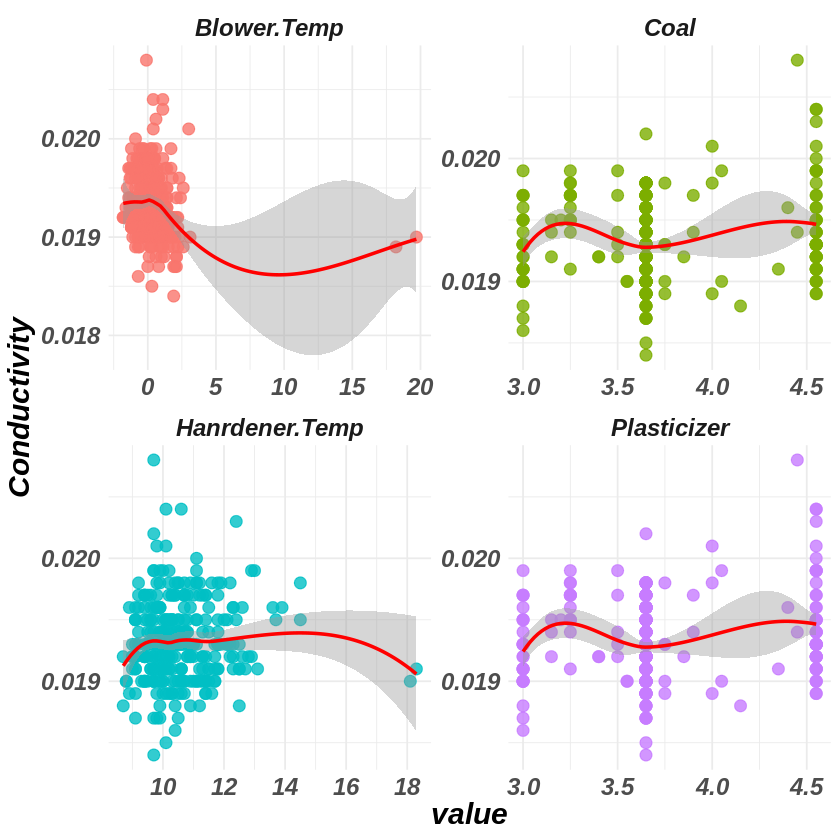

In [6]:
# Initial Preprocessing
## Feature Selection
df <- raw_data[ , -c(1:6, 10, 14:15, 39:45, 51:61, 63:64)]
colnames(df) <- c('Lot_ID', 'Date', 'Viscosity', 'React.Time', 'React.Temp',
                  'Thickness', 'Resin', 'Hardener', 'Blower', 'Plasticizer', 
                  'Coal', 'Resin.Temp', 'Hanrdener.Temp', 'Blower.Temp',
                  'Speed', 'U.Temp', 'L.Temp',
                  'Pressure1', 'Pressure2', 'Pressure3',
                  'Pressure4', 'Pressure5', 'Pressure6',
                  'Pressure7', 'Pressure8', 'Pressure9',
                  'Pressure10', 'Pressure11', 'Conductivity','ShrinkageL', 'ShrinkageW',
                  'Peel.Strength1', 'Peel.Strength2', 'Peel.Strength3', 'Tissue.Type', 
                  'Length')

## Handling the Not Availables
dim(df)
apply(df, 2, function(x) sum(is.na(x)))
df <- na.omit(df)
dim(df)

## Remove Lot Length
df <- df[ , -36]

## Removing features with zero variance 
# df.nzv <- nearZeroVar(df, saveMetrics = F)
# if(length(df.nzv) > 0) df <- df[ , -df.nvz]

## Separating the dates
df <- df %>% separate(Date, into = c('Year', 'Month', 'Day'), sep = '/')
df <- df %>% filter(!c(Month %in% c('01', '02', '03', '11', '12') & Year == '20'))
df <- df %>% filter(!c(Month %in% c('01', '02') & Year == '21'))

with(df, table(Year, Month))

## Encoding on Tissue.Type
df$Tissue.Type <- factor(df$Tissue.Type)

## Handling Targets
### Shrinkage
df <- df %>% filter(apply(df[ , 32:33], 1, sd) < 0.12)
df$Shrinkage <- apply(df[ , 32:33], 1, mean)
df <- df[ , -c(32:33)]

### Peel.Strength (removed)
df <- df[ , -c(32:34)]
df <- df[ , c(1:30, 32, 31, 33)]

## Removing outliers
### Targets
gather(data = df[ , 32:33],key = 'var', value = 'value') %>% 
  ggplot(aes(x = value, fill = var))+
  geom_histogram(size = 0.3, color = 'black', show.legend = F,
                 bins = 50, alpha = 0.8)+
  theme(text = element_text(size = 18, face = 'bold.italic'))+
  facet_wrap(~var, scale = 'free')
    
    
 
df <- df %>% filter(Shrinkage > -2.0 & Shrinkage < -0.1)
df <- df %>% filter(Conductivity > 0.0170, Conductivity < 0.021)

### React.Time
df <- df %>% filter(React.Time > 10, React.Time < 50)

### React.Temp
df <- df %>% filter(React.Temp > 50, React.Temp < 150)

### Line Speed
df <- df %>% filter(Speed > 3.0)

### Upper and Lower Dryer Temp
ggplot(data = df, aes(x = U.Temp))+
  geom_histogram(size = 0.3 , color = 'black', show.legend = F,
                 alpha = 0.8, bins = 50, fill = 'steelblue')+
  theme(text = element_text(size = 18, face = 'bold.italic'))

df <- df %>% filter(U.Temp > 45 & U.Temp < 70)
df <- df %>% filter(L.Temp > 45 & L.Temp < 70)

### Pressure2
df <- df %>% filter(Pressure2 < 10)

### Pressure3
df <- df %>% filter(Pressure3 < 10)

### Pressure4
df <- df %>% filter(Pressure4 < 30)

### Pressure5
df <- df %>% filter(Pressure5 > 0)

### Pressure6
df <- df %>% filter(Pressure6 > 5)

### Pressure7
df <- df %>% filter(Pressure7 > 10)

### Pressure8
df <- df %>% filter(Pressure8 > 20)

### Pressure9
df <- df %>% filter(Pressure9 > 10)

### Pressure10
df <- df %>% filter(Pressure10 > 10)

### Pressure11
df <- df %>% filter(Pressure11 > 5 & Pressure11 < 40)

### Blower
df <- df %>% filter(Blower < 12)

### Viscosity
df <- df %>% filter(Viscosity > 10000 & Viscosity < 50000)

# Feature Engineering
## Pressure slope on Dryers
df <- df %>% mutate(P1 = Pressure6 - Pressure4,
                    P2 = Pressure8 - Pressure6,
                    P3 = Pressure8 - Pressure11)

## Effects of created variables
gather(df[ , c(32, 34:36)], -Conductivity, key = 'var', value = 'value') %>% 
  rename(Zone = var, Pressure = value) %>% 
  ggplot(aes(x = Pressure, y = Conductivity, color = Zone))+
  geom_jitter(width = 0.4, size = 4, alpha = 0.8)+
  geom_smooth(method = 'loess', se = T, color = 'black')+
  theme(text = element_text(size = 18, face = 'bold.italic'))+
  facet_wrap(~ Zone, scale = 'free')


## Feature Selection
colnames(df)
gather(df[ , c(12:13, 15:16, 32)], -Conductivity, 
       key = 'var', value = 'value') %>% 
  ggplot(aes(x = value, y = Conductivity, color = var))+
  geom_point(size = 3, alpha = 0.8, show.legend = F)+
  geom_smooth(method = 'loess', se = T, color = 'red')+
  theme(text = element_text(size = 18, face = 'bold.italic'))+
  facet_wrap(~var, scale = 'free')

df <- df[ , -c(12:13, 15:16)]
df <- df[ , c(1:27,30:32, 28:29)]
colnames(df)